In [1]:
%matplotlib notebook
import sys 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import colorConverter, ListedColormap

sns.set_style('darkgrid')
np.random.seed(seed=13)

In [2]:
x = np.random.uniform(0, 1, 20)

def f(x):
    return x * 2

noise_variance = .2
noise = np.random.randn(x.shape[0]) * noise_variance
t = f(x) + noise

<IPython.core.display.Javascript object>


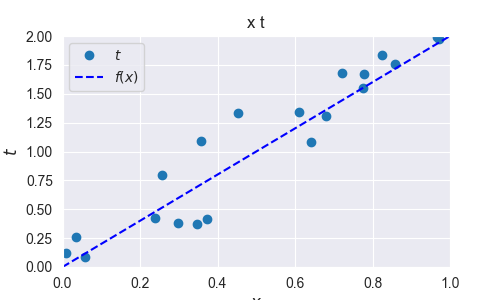

In [3]:
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('x t')
plt.legend(loc=2)
plt.show()

In [4]:
def nn(x, w):
    return x * w

def loss(y, t):
    return np.mean((t - y)**2)

<IPython.core.display.Javascript object>


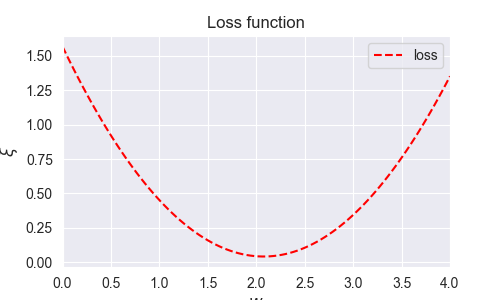

In [5]:
ws = np.linspace(0, 4, num=100)
loss_ws = np.vectorize(lambda w: loss(nn(x, w), t))(ws)

plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Loss function')
plt.xlim(0, 4)
plt.legend()
plt.show()

In [6]:
def gradient(w, x, t):
    """ y = nn(x, w) = x * w"""
    return 2 * x * (nn(x, w) - t)

def delta_w(w_k, x, t, learning_rate):
    return learning_rate * np.mean(gradient(w_k, x, t))

w = np.random.rand()
learning_rate = .9

nb_of_iterations = 4
w_loss = [(w, loss(nn(x, w), t))]
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)
    w = w - dw
    w_loss.append((w, loss(nn(x, w), t)))
    
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

w(0): 0.1380 	 loss: 1.3710
w(1): 1.3722 	 loss: 0.2174
w(2): 1.8205 	 loss: 0.0651
w(3): 1.9834 	 loss: 0.0451
w(4): 2.0426 	 loss: 0.0424


<IPython.core.display.Javascript object>


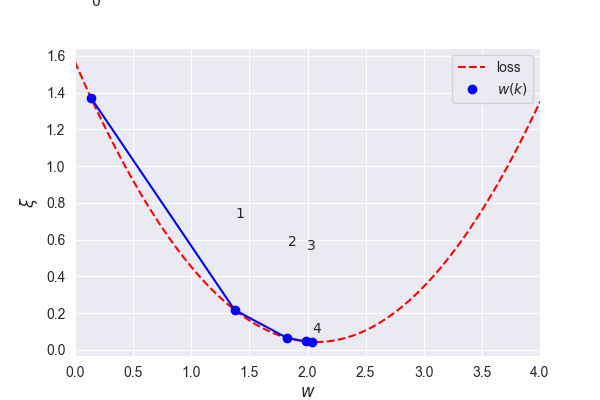

In [7]:
plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss') # loss curve
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i + 1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2], [c1, c2], 'b-')
    plt.text(w1, c1+.5, f'${i}$')

plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+.05,  f'${i+1}$')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()

In [8]:
w = np.random.rand()
nb_of_iterations = 10
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)
    w = w - dw

<IPython.core.display.Javascript object>


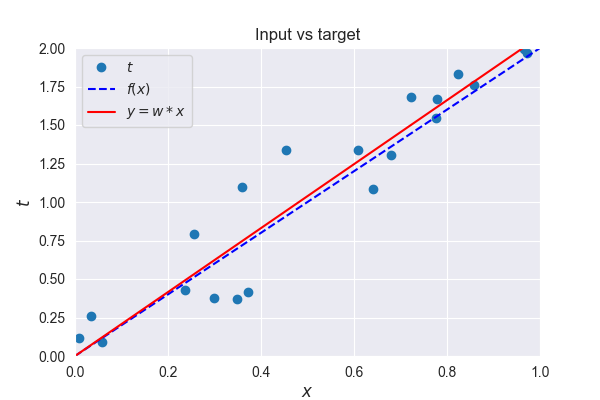

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(x, t, 'o', label='$t$')
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.plot([0, 1], [0*w, 1*w], 'r-', label='$y = w * x$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.title('Input vs target')
plt.legend(loc=2)
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.show()

In [ ]:
nb_of_samples_per_class = 20
red_mean = (-1., 0.)
blue_mean = (1., 0.)